In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

## Податоци

In [2]:
data = pd.read_csv("../data/data.csv")
data = data.drop(["Unnamed: 0","logPrice"],axis=1)
print("Number of records = " + str(data.shape[0]))
print("Number of features = " + str(data.shape[1]))
data.head()

Number of records = 378
Number of features = 72


,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Micromax,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,0,0,0,0,1,0,0,0,0,0
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
boolean_columns = ['Touchscreen', 'Headphones','Face unlock', 'Fingerprint sensor', 'Wireless charging',
       'NFC', '4G/ LTE', '5G','3G', 'EDGE', 'GPRS', 'Wi-Fi', 'VoLTE', 'Bluetooth', 'GPS', 'FM Radio', 'Fast Charging', 'Removable Battery',
       'Card Slot', 'Light Sensor', 'Compass Sensor', 'Proximity Sensor', 'Magnetic Sensor',
       'Gravity Sensor', 'Heathtracking Sensor', 'Gyroscope Sensor', 'Accelerometar Sensor',
       'Vibration Sensor', 'Laser Sensor']
categorical_columns = ['SIM Type', 'Usb Type', 'OS', 'cpuCores', 'Chipset', 'Flash','Launched_Month', 'Launched_Year']
numerical_columns = ['Battery capacity', 'Screen Size', 'Internal storage','Number of SIMs','Expandable storage', 'Price'
                    ,'CPU', 'RAM', 'Rear Camera', 'Front Camera','PPI','Width', 'Height', 'Weight','Number of Rear Cameras','Resolution_x', 
                     'Resolution_y','logPrice']
brand_columns = ['Brand__Coolpad', 'Brand__Google', 
       'Brand__Huawei', 'Brand__Infinix', 'Brand__LG', 'Brand__Lenovo',
       'Brand__Micromax', 'Brand__Motorola', 'Brand__Nokia', 'Brand__OnePlus',
       'Brand__Oppo',  'Brand__Realme', 'Brand__Samsung',
       'Brand__Tecno', 'Brand__Vivo', 'Brand__Xiaomi','Brand__Apple']

In [4]:
data = data.drop(brand_columns,axis=1)

In [5]:
data.head()

,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Compass Sensor,Proximity Sensor,Magnetic Sensor,Gravity Sensor,Heathtracking Sensor,Gyroscope Sensor,Accelerometar Sensor,Vibration Sensor,Laser Sensor,Manufacturer
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,1,1,0,0,0,1,1,0,0,11
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0


Овие знаеме дека треба да ги тргнеме од визуелизациите

In [6]:
to_remove = ['3G', 'Wi-Fi', 'Bluetooth', 'GPS', 'Proximity Sensor', 'Accelerometar Sensor']
data = data.drop(to_remove,axis=1)
for column in to_remove:
    boolean_columns.remove(column)
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 6 features
Updated number of features = 49


Визуелизации за тергет варијаблата 

16:		84
15:		69
13:		59
12:		49
0:		49
11:		26
9:		13
6:		6
10:		5
7:		5
14:		4
4:		2
3:		2
8:		2
5:		1
2:		1
1:		1


Text(0.5, 1.0, 'Manufacturer')

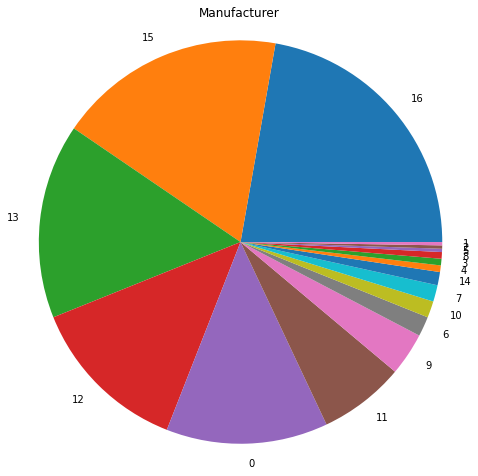

In [7]:
counts = data['Manufacturer'].value_counts()
counts_dict = counts.to_dict()

for key,value in counts_dict.items():
    print(str(key) + ":\t\t" + str(value))

plt.figure(figsize=(8,8))
patches, texts = plt.pie(list(counts_dict.values()),labels=list(counts_dict.keys()))
plt.axis('equal')
plt.title("Manufacturer")

Ги тргаме помалку застапените класи бидејќи немаме доволно податоци за тренирање на нив. Можда пробај да ги ставиш у посебна категорија other 

In [8]:
n = data.shape[0]
data = data.loc[data['Manufacturer'].isin(counts.index[counts > 10])]
print("Removed " + str(n-data.shape[0]) + " records")
print("Updated number of records = " + str(data.shape[0]))

Removed 29 records
Updated number of records = 349


In [9]:
correlated_columns = set()
for i in range(len(data.columns)):
    for j in range(i+1,len(data.columns)):
        correlation = data[data.columns[i]].corr(data[data.columns[j]]) 
        if correlation > 0.6:
            correlated_columns.add(data.columns[i])
            correlated_columns.add(data.columns[j])
correlated_columns = list(correlated_columns)

Text(0.5, 1.0, 'Correlation Heatmap')

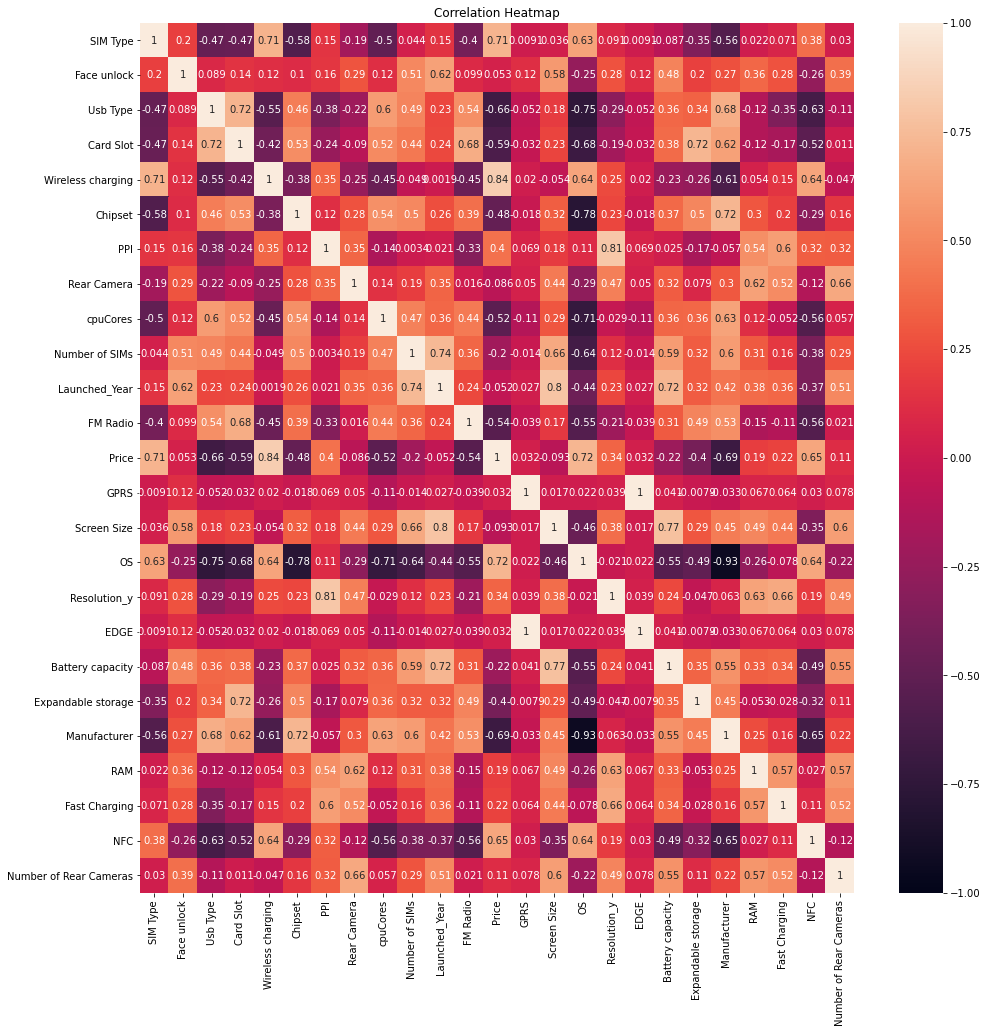

In [10]:
correlated_data = data[correlated_columns]
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(correlated_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

In [11]:
to_remove = ['EDGE']
data = data.drop(to_remove,axis=1)
boolean_columns.remove('EDGE')
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 1 features
Updated number of features = 48


## Класификација

In [12]:
X = data.drop(['Manufacturer'], axis=1)
y = data['Manufacturer']

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

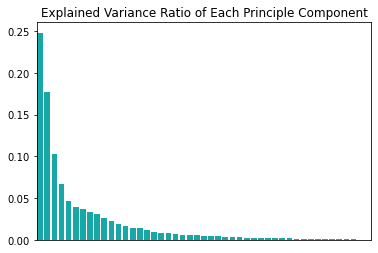

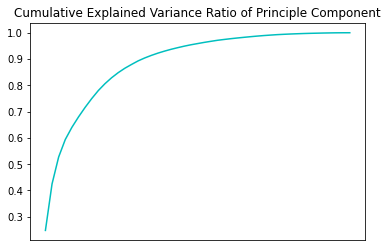

Cumulative variance of 80% reached at component 9


In [14]:
pca = PCA(n_components = None)
pca.fit(X)
X_pca = pca.transform(X)

plt.figure()
sns.barplot(x=np.arange(X.shape[1]),y=pca.explained_variance_ratio_, color="c")
plt.xticks([])
plt.title("Explained Variance Ratio of Each Principle Component")
plt.show()

plt.figure()
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(X.shape[1]),cumulative_explained_variance, color="c")
plt.xticks([])
plt.title("Cumulative Explained Variance Ratio of Principle Component")
plt.show()
res = list(map(lambda i: i> 0.8, cumulative_explained_variance)).index(True) 
print("Cumulative variance of 80% reached at component", res)

In [15]:
pca = PCA(n_components = 9)
pca.fit(X)
X_pca = pca.transform(X)

In [16]:
gnb = GaussianNB() 
scores = cross_val_score(gnb, X_pca, y, cv=10)
print(scores.mean())
print(scores.std())

0.5440336134453782
0.11987576837978449


In [17]:
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda, X_pca, y, cv=10)
print(scores.mean())
print(scores.std())

0.5273949579831931
0.11306265975430689


In [18]:
qda = QuadraticDiscriminantAnalysis()
scores = cross_val_score(qda, X_pca, y, cv=10)
print(scores.mean())
print(scores.std())

0.6163025210084034
0.1441308517360018


C:\ProgramData\Anaconda3\envs\data_mining\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
